## Project Objective:
Exploring zomato dataset and building the best model that forecasts the approximate cost of a meal for two people using the attributes location, rating, restaurant type, and cuisine.

## 1. Introduction

The Zomato dataset comprises of restaurant data. These restaurants are residing in different areas of Bangalore city which is an IT capital of India. This dataset contains 17 attributes in which approx_cost and rate is significant numeric attributes. On basis of these attributes, we can evalulate comparison between cost and rating. There are some string fields which are also significant such as location and rest_type which will help in determing locations and restaurant types favourable to most customers. The gathered insights of this dataset also help in identifying factors that are influencing restaurant business in Bangalore city, for instance demographic location, restaurant theme, popular food in locality etc.

In [296]:
#loading libraries
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

## 2. Data Preprocessing and Understanding
### a) Loading the data

In [304]:
#load data using pandas read_csv function
zomato_data=pd.read_csv('zomato.csv')
zomato_data = zomato_data.rename(columns={'approx_cost(for two people)':'approx_cost'})


### b) Exploring the trends in data
#### Total number of Restaurants in specific neighbourhood location
BTM neighbour location has highest number of restaurants, while HSR and Koramangala 5th Block neighbourhood location has most number of restaurant after BTM.

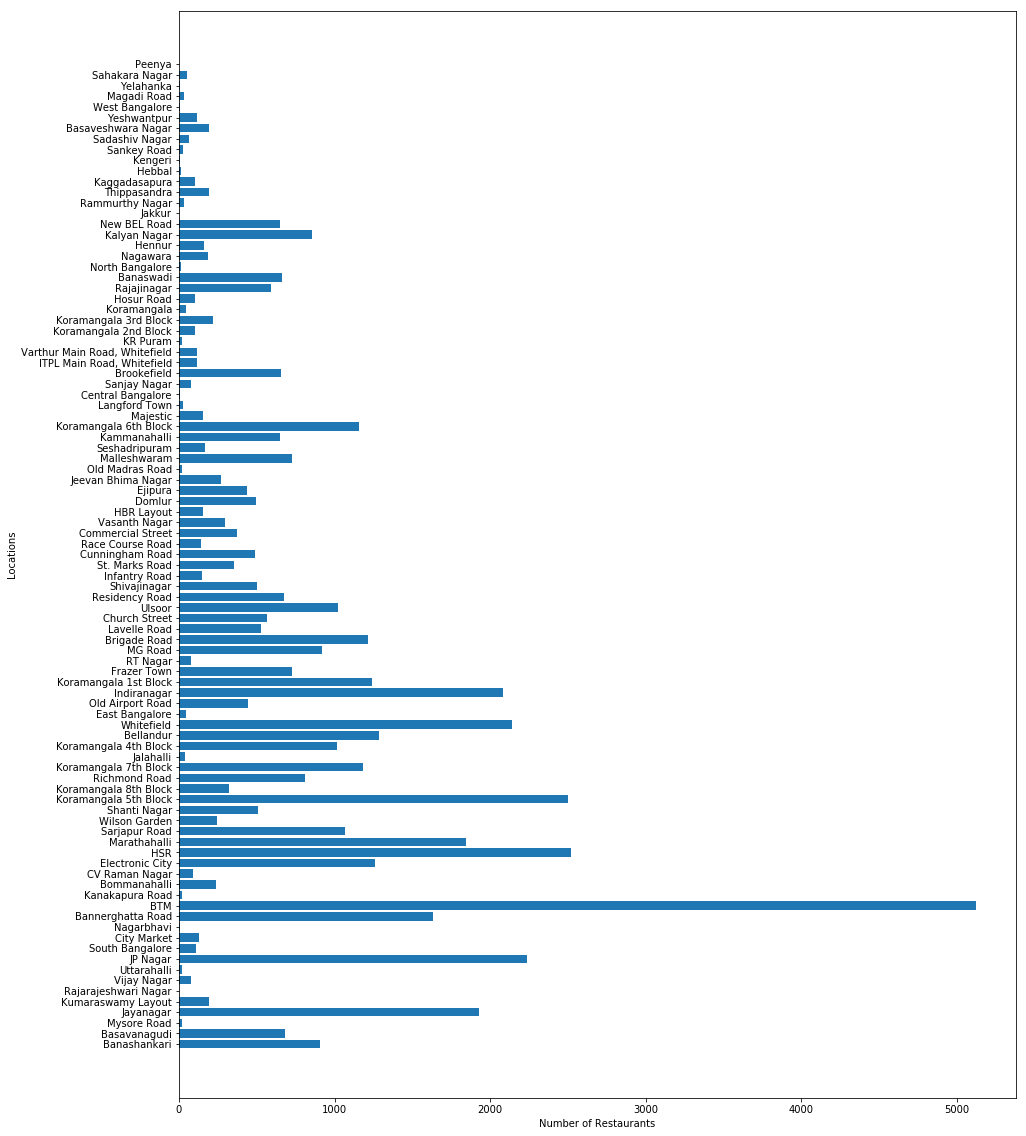

In [305]:
#Plot number of restaurants exist at specific location

dictLocations = {}

#fetch all unique locations in array
locations = zomato_data["location"].dropna().unique()
#loop through each location and set the total number restaurant exist at that location
for i in locations:
    dictLocations[i]=len(np.where(zomato_data["location"]==i)[0])
#set the plot paramters    
plt.figure(figsize=(15,20))
plt.barh(range(len(dictLocations)), list(dictLocations.values()))
plt.yticks(range(len(dictLocations)), list(dictLocations.keys()))

plt.ylabel('Locations')
plt.xlabel('Number of Restaurants')

plt.show()

#### Percentage of restaurants that facilitate with online ordering
Approximately 58.9% Restaurants facilitates with online ordering and 41.1% does not facilitate online ordering.
#### Percentage of restaurants that allows to book table
Only 12.5% Restaurants facilitates with option to book table, while rest of 87.5% does not prefer to provide this facility.

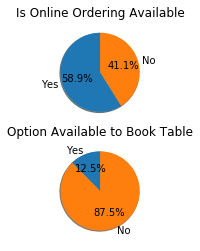

In [306]:
#initialize dictionery for first pie chart and send length of Yes/No paramater
dictOrderOnline={}
dictOrderOnline['Yes']=len(np.where(zomato_data["online_order"]=='Yes')[0])
dictOrderOnline['No']=len(np.where(zomato_data["online_order"]=='No')[0])

#initialize dictionery for second pie chart and send length of Yes/No paramater
dictBookTable={}
dictBookTable['Yes']=len(np.where(zomato_data["book_table"]=='Yes')[0])
dictBookTable['No']=len(np.where(zomato_data["book_table"]=='No')[0])

explode = (0, 0) 
## plotting the graph
fig1, (ax1,ax2) = plt.subplots(2,1)
ax1.pie(dictOrderOnline.values(), explode=explode, labels=dictOrderOnline.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
 
ax2.pie(dictBookTable.values(), explode=explode, labels=dictBookTable.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.title.set_text("Is Online Ordering Available")
ax2.title.set_text("Option Available to Book Table")

plt.show()


### Percentage of different types of restaurants
Approximately 50.2% Restaurants are based on delivery while 34.4% are based on dine-out.

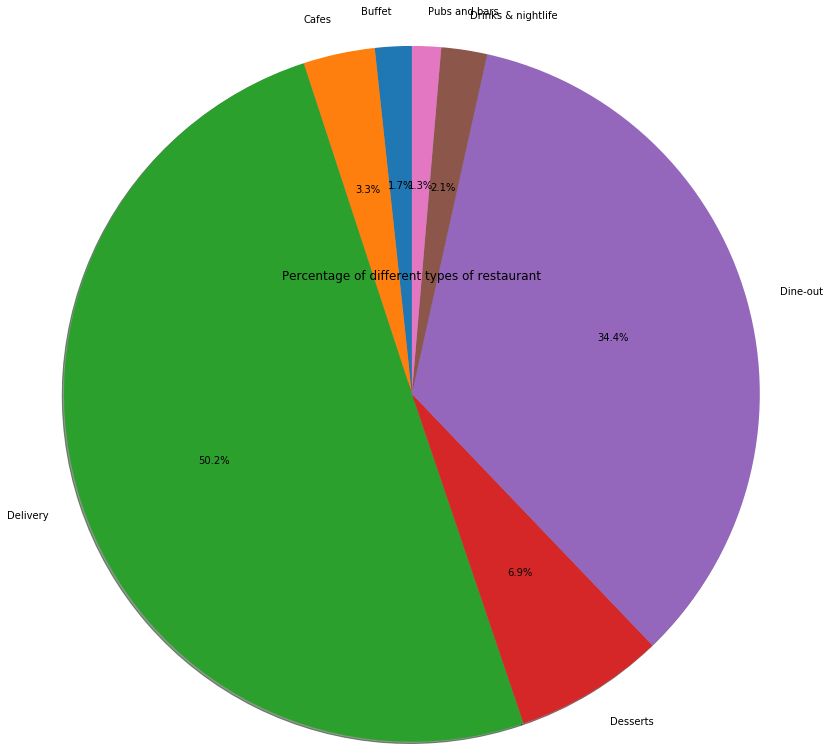

In [307]:
#initilize the dictionery for listed types of restaurants
diclistedTypes = {}
listedRestTypes=zomato_data["listed_in(type)"].dropna().unique()
for i in listedRestTypes:
    diclistedTypes[i]=len(np.where(zomato_data["listed_in(type)"]==i)[0])

#plotting the graph 
fig1, ax1= plt.subplots(1,1)
ax1.pie(diclistedTypes.values(), labels=diclistedTypes.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90,radius=4)
ax1.title.set_text("Percentage of different types of restaurant")
plt.show()
        

### Average Cost of two People per restaurant type
The graph depicts that Restaurant type fine dining, microbrewery, bar and Lounge has highest average cost for two people.

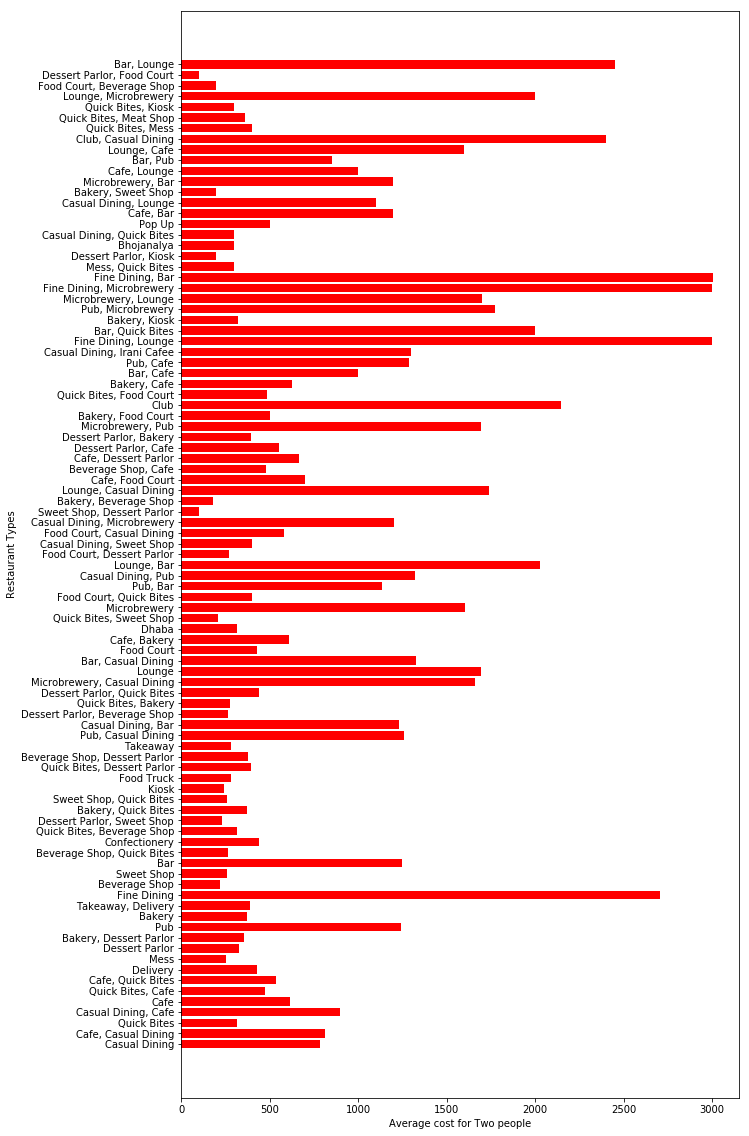

In [308]:
dicRestTypes = {}

#fetch all unique restaurant types
restType = zomato_data["rest_type"].dropna().unique()
for i in restType:
    indexes = np.where(zomato_data["rest_type"]==i)[0]
    totalCost=0;
    #running the nested loop to fetch all cost of specific restaurant types
    for j in indexes:
        cost = zomato_data["approx_cost"][j]
        if(type(cost) is not float):
            cost = cost.replace(',','')
        elif(math.isnan(cost)):
            cost = 0
        totalCost = totalCost+float(cost)
    #setting the average of cost in dictionery
    dicRestTypes[i]=totalCost/len(np.where(i==zomato_data["rest_type"])[0])

#plotting the graph
plt.figure(figsize=(10,20))
plt.barh(range(len(dicRestTypes)), list(dicRestTypes.values()),color=['red'])
plt.yticks(range(len(dicRestTypes)), list(dicRestTypes.keys()))

plt.ylabel('Restaurant Types')
plt.xlabel('Average cost for Two people')
plt.show()

### Are there attributes useless at this point

Yes, there are some attributes which provides no essential information such as address, URL and phone

## Removing duplicate resturants in data

In [309]:
print("Number of records before removing duplicates: "+str(len(zomato_data)))
#dropping all duplicates except first. The data is removed on basis of name
zomato_data.drop_duplicates(subset ="name", keep = 'first', inplace = True) 
print("Number of records after removing duplicates: "+str(len(zomato_data)))


Number of records before removing duplicates: 51717
Number of records after removing duplicates: 8792


## Neighbour hood with highest average rating and their characteristics

The highest (average rated) neighbourhood is North Bangalore with 4.2 rating. The  popular food offered by this neighbourhood are North Indian, Chinese, Arabian, Momos, and popular restaurant types are Bar and Lounge.


In [310]:
import operator
locations = zomato_data["location"].dropna().unique()
#cleaning the rate attribute data
zomato_data['rate'] = zomato_data['rate'].str.strip()
zomato_data['rate'] = zomato_data['rate'].str.replace('-','0')
zomato_data['rate'] = zomato_data['rate'].str.replace('NEW','0')
zomato_data['rate'] = zomato_data['rate'].str.replace('/5','')
zomato_data['rate'] = zomato_data['rate'].fillna(value=0)
zomato_data['rate'] = zomato_data['rate'].str.strip()

#initialize dictionery of highest rated neighbourhood
dicHighestRatedNeighbourhood= {}
#loop through each location and caluclate avergage of rate by each location
for i in locations:
     locationIndexes = np.where(zomato_data["location"]==i)[0]
     count = 0
     rate = 0.0
     for j in locationIndexes:
         try:
            if(zomato_data["rate"][j].strip()!='0'):
                rate = rate + float(zomato_data["rate"][j].strip())
                count = count + 1
         except:
            continue
     if(count != 0):
        dicHighestRatedNeighbourhood[i] = rate/count

#sort dictionery of highest rated neigbourhood in ascending order   
sortedRates = sorted(dicHighestRatedNeighbourhood.items(), key=operator.itemgetter(1))
#access the last index for highest rated neighbourhood
highestRatedNeighbour = sortedRates[len(sortedRates)-1]
print('The highest(average rated) neighbourhood is '+highestRatedNeighbour[0]+' with '+str(highestRatedNeighbour[1])+' rating')

#initialize dictionery of food types and restaurant types with 0
dictPopularFoodTypes= {k: 0 for k in zomato_data["cuisines"].dropna().unique()} 
dictPopularRestTypes= {k: 0 for k in zomato_data["rest_type"].dropna().unique()} 

#set the location indexes of heighest rated neighbourhood and increment the fround food type and rest type by 1
locationIndexes = np.where(zomato_data["location"]==highestRatedNeighbour[0])[0]
for i in locationIndexes:
    try:
        dictPopularFoodTypes[zomato_data["cuisines"][j]]+=1
    except:
        count = 0
    try:
        dictPopularRestTypes[zomato_data["cuisines"][j]]+=1
    except:
        count = 0

# sort the dictioneries    
sortedpopularFoodTypes = sorted(dictPopularFoodTypes.items(), key=operator.itemgetter(1))
sortedpopularRestTypes = sorted(dictPopularRestTypes.items(), key=operator.itemgetter(1))

#print the output
print('Following are the charatersticks of '+highestRatedNeighbour[0])
print('Popular food offered: '+sortedpopularFoodTypes[len(sortedpopularFoodTypes)-1][0])
print('Popular Restaurant Types: '+sortedpopularRestTypes[len(sortedpopularRestTypes)-1][0])


The highest(average rated) neighbourhood is North Bangalore with 4.2 rating
Following are the charatersticks of North Bangalore
Popular food offered: North Indian, Chinese, Arabian, Momos
Popular Restaurant Types: Bar, Lounge


# Building the Model to Forecast Cost of Meal for Two People

## a) Type of Task Solving
This type of task is regression because we are predicting numeric value and the target variable is cost (numeric quanitity).

## b) Choosen Models

### i) Linear regression
The reason I choosed linear regression because it reduces the mean square of the errors and it puts strong penalty on large errors.
### ii) Random Forest
The random forest result is based on multiple decision trees and each tree is trained separately. The result is based on votes from different decsion tree, therefore it yields better result.

### iii) Xg-boost
The XG Boost is based on gradient boosting and it is popular in term of accurate results. The training process  is iterative. This works on adding new trees that notes the error of previous tree and combine the results with previous tree to make more accurrate results.

## c) Which metrics choosed to evaluate the model

### i) R2 Score
R2 Score determines how close is data to regression line.

### ii) Mean Square Error
This metric is the mean of square of predictions.

## d) How to make sure that not to overfitting

To make sure that model is not overfitting, I have used cross-validation. Cross-validation will allow to estimate generalization performance and also gives statistical value such as mean. Overfitting can also be checked by performing test on training data. The higher accurracies may be due to memorization of data.




In [311]:
#Preparing data for training
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#cleaning the data
zomato_data['approx_cost'] = zomato_data['approx_cost'].str.replace(',','')
zomato_data['approx_cost'] = zomato_data['approx_cost'].fillna(value=0)
zomato_data['rate'] = zomato_data['rate'].fillna(value=0)

#making a seperate copy for training so graph data won't get affected on compiling again
zomato_data_copy = zomato_data.copy()

#removing other columns
try:
    zomato_data_copy = zomato_data_copy.drop(['url', 'address', 'name', 'online_order','book_table','votes','phone','dish_liked','reviews_list','menu_item','listed_in(type)','listed_in(city)'], axis=1)
except:
    print('column already dropped')
    
#encode training data
encoded_data = pd.get_dummies(zomato_data_copy,columns=["location","cuisines","rest_type"],prefix=["location","cuisines","rest_type"])
target=encoded_data["approx_cost"]
target = target.astype(float)

#retrive the features excluding target variable
features = encoded_data[encoded_data.columns.drop('approx_cost')]

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [313]:
#implementing Linear Regression
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

r2_linear_regression_train = r2_score(y_train, y_pred_train)
ms_linear_regression_train = mean_squared_error(y_train, y_pred_train)

print("\n\nChecking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

r2_linear_regression_test = r2_score(y_test, y_pred)
ms_linear_regression_test = mean_squared_error(y_test, y_pred)

#cross validation of Linear regression
from sklearn.model_selection import cross_val_score
cross_validation_linear_regression = cross_val_score(linear_regression,X_train,y_train,cv=5)
print("Output from cross-validation: " +str(cross_validation_linear_regression.mean()))


Checking error/score on training Data
Mean Square Error: 55273.63315796957
R2 score: 0.705906385057932


Checking error/score on test Data
Mean Square Error: 69664.58214894826
R2 score: 0.6138321839908336
Output from cross-validation: -5.7735526737801655e+20


In [314]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_train = random_forest_model.predict(X_train)

print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

r2_random_forest_train = r2_score(y_train, y_pred_train)
ms_random_forest_train = mean_squared_error(y_train, y_pred_train)

print("\n\nChecking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

r2_random_forest_test = r2_score(y_test, y_pred)
ms_random_forest_test = mean_squared_error(y_test, y_pred)

#cross validation of Random forest
cross_validation_random_forest = cross_val_score(random_forest_model,X_train,y_train,cv=5)
print("Output from cross-validation:")
cross_validation_random_forest.mean()



Checking error/score on training Data
Mean Square Error: 9094.350511302147
R2 score: 0.9516118216840346


Checking error/score on test Data
Mean Square Error: 51896.84482785471
R2 score: 0.7123230972362644
Output from cross-validation:


0.692799520679797

In [315]:
#XG Boost Implementation

import xgboost as xgb

xb = xgb.XGBRegressor(silent=True)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)
y_pred_train = xb.predict(X_train)

print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

r2_xg_boost_train = r2_score(y_train, y_pred_train)
ms_xg_boost_train = mean_squared_error(y_train, y_pred_train)

print("\n\nChecking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

r2_xg_boost_test = r2_score(y_test, y_pred)
ms_xg_boost_test = mean_squared_error(y_test, y_pred)

target = target.astype(float)
features = features.astype(float)

#cross validation of XG Boost
cross_validation_xg_boost = cross_val_score(xb,X_train,y_train,cv=5)
print("Output from cross-validation:")
cross_validation_xg_boost.mean()


Checking error/score on training Data
Mean Square Error: 45853.59754383917
R2 score: 0.7560274313572595


Checking error/score on test Data
Mean Square Error: 53440.41957355148
R2 score: 0.7037666849245081
Output from cross-validation:


0.6965599299656037

### e) Plotting cross validation graph on built models

The graphs below dipicts that random forest and xgboost have ideal cross validation values, which represents that model is neither underfitted or overfitted. Although there is a cross validation plot for linear regression, but ideally this plot is not used for linear regression. 

The plot of metrics and their description is mentioned in part f)


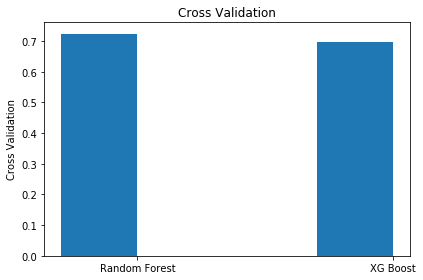

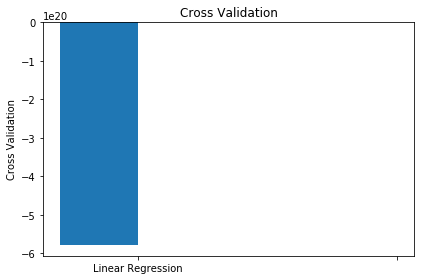

In [340]:
#plotting cross validation graphs
cvs  = (cross_validation_random_forest.mean(),cross_validation_xg_boost.mean())

ind = np.arange(len(cvs)) 
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, cvs, width)


ax.set_ylabel('Cross Validation')
ax.set_title('Cross Validation')
ax.set_xticks(ind)
ax.set_xticklabels(('Random Forest', 'XG Boost'))


fig.tight_layout()

plt.show()


cvs  = (cross_validation_linear_regression.mean(),0)
ind = np.arange(len(cvs)) 
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, cvs, width)

ax.set_ylabel('Cross Validation')
ax.set_title('Cross Validation')
ax.set_xticks(ind)
ax.set_xticklabels(('Linear Regression',''))
fig.tight_layout()
plt.show()

### f) Comparing train and test results
 
Test performed on training data is yielding better results, because training data is not generalized. Test performed on test data is yielding lesser R2 Score and more mean square than training data, because test data is more generalized. Random forest and XG Boost keep the R2 score at nearly 70% on test data, while linear regression keep the score at 61%.
 

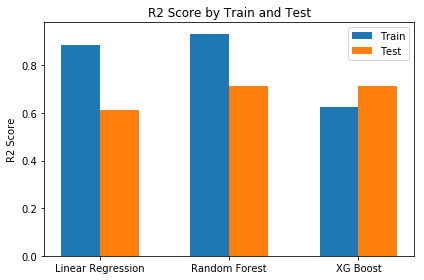

In [342]:
#plotting R2 Score of each of these models in terms of training and testing

train_data  = (r2_linear_regression_train, r2_random_forest_train, r2_xg_boost_train)
test_data = (r2_linear_regression_test, r2_random_forest_test, r2_random_forest_test)

ind = np.arange(len(train_data)) 


width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, train_data, width,label='Train')
rects2 = ax.bar(ind + width/2, test_data, width,label='Test')


ax.set_ylabel('R2 Score')
ax.set_title('R2 Score by Train and Test')
ax.set_xticks(ind)
ax.set_xticklabels(('Linear Regression', 'Random Forest', 'XG Boost'))
ax.legend()


fig.tight_layout()

plt.show()

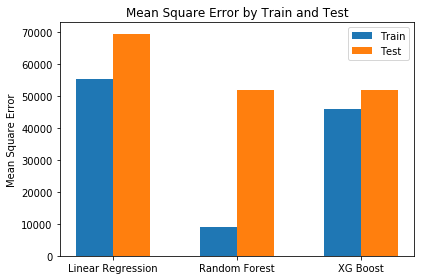

In [319]:
#plotting Mean square error in terms of training and testing

train_data  = (ms_linear_regression_train, ms_random_forest_train, ms_xg_boost_train)
test_data = (ms_linear_regression_test, ms_random_forest_test, ms_random_forest_test)

ind = np.arange(len(train_data)) 


width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, train_data, width,label='Train')
rects2 = ax.bar(ind + width/2, test_data, width,label='Test')


ax.set_ylabel('Mean Square Error')
ax.set_title('Mean Square Error by Train and Test')
ax.set_xticks(ind)
ax.set_xticklabels(('Linear Regression', 'Random Forest', 'XG Boost'))
ax.legend()


fig.tight_layout()

plt.show()

## g)Tuning the Model using grid search

The grid search is used to tune paramters as shown below. Grid search works on passing the hyperparameters. The value of hyperparameter is explicitly defined before training the model. This values does not depend on the training data.  Grid search is better in tuning parameters on random forest. Its R2 score is slightly increased while mean-square is slightly decreased. The Grid search is improving results because it finds optimal parameters which increases the accurracy. 

In [333]:
#Model Tuning with GridSearch on Linear Regression


from sklearn.model_selection import GridSearchCV
linear_regression = linear_model.LinearRegression()

grid_parameters = {'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True, False]}
lr_model = GridSearchCV(estimator=linear_regression,param_grid=grid_parameters,cv=5,n_jobs=-1)
lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

r2_linear_regression_train = r2_score(y_train, y_pred_train)
ms_linear_regression_train = mean_squared_error(y_train, y_pred_train)

print("\n\nChecking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

r2_linear_regression_test_after = r2_score(y_test, y_pred)
ms_linear_regression_test_after = mean_squared_error(y_test, y_pred)


Checking error/score on training Data
Mean Square Error: 21441.906283939905
R2 score: 0.8859143615135472


Checking error/score on test Data
Mean Square Error: 7.864146246567026e+22
R2 score: -4.359288589889749e+17


In [325]:
#Model Tuning with GridSearch on Random Forest

from sklearn.model_selection import GridSearchCV
random_forest = RandomForestRegressor()

grid_parameters = {"min_samples_split":[3,6,9],"max_features":["auto","sqrt","log2"],"n_estimators":[8,16,24]}
rf_model = GridSearchCV(estimator=random_forest,param_grid=grid_parameters,cv=5,n_jobs=-1)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

r2_random_forest_train = r2_score(y_train, y_pred_train)
ms_random_forest_train = mean_squared_error(y_train, y_pred_train)

print("\n\nChecking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

r2_random_forest_test_after = r2_score(y_test, y_pred)
ms_random_forest_test_after = mean_squared_error(y_test, y_pred)

#cross validation of Random forest
cross_validation_random_forest = cross_val_score(rf_model,X_train,y_train,cv=5)
print("Output from cross-validation:")
cross_validation_random_forest.mean()


Checking error/score on training Data
Mean Square Error: 12521.901210924445
R2 score: 0.9333749025951761


Checking error/score on test Data
Mean Square Error: 50284.97529840095
R2 score: 0.7212580842365457
Output from cross-validation:


0.7249999672437041

In [327]:
#Mode Tuning with GridSearch on XGBoost
xb = xgb.XGBRegressor(silent=True)

grid_parameters = {"min_samples_split":[3,6,9],"max_features":["auto","sqrt","log2"],"n_estimators":[8,16,24]}
xb_model = GridSearchCV(estimator=xb,param_grid=grid_parameters,cv=5,n_jobs=-1)

xb_model.fit(X_train, y_train)
y_pred = xb_model.predict(X_test)
y_pred_train = xb_model.predict(X_train)

print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

r2_xg_boost_train = r2_score(y_train, y_pred_train)
ms_xg_boost_train = mean_squared_error(y_train, y_pred_train)

print("\n\nChecking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

r2_xg_boost_test_after = r2_score(y_test, y_pred)
ms_xg_boost_test_after = mean_squared_error(y_test, y_pred)



Checking error/score on training Data
Mean Square Error: 70602.94254002062
R2 score: 0.6243439518839019


Checking error/score on test Data
Mean Square Error: 72162.06443591279
R2 score: 0.5999880288903751


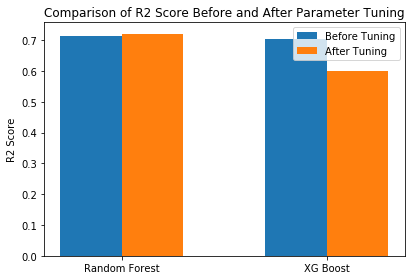

In [330]:
#plotting R2 Score showing changes in R2 Score before tuning and After tuning

before_tuning  = (r2_random_forest_test , r2_xg_boost_test)
after_tuning = (r2_random_forest_test_after , r2_xg_boost_test_after)

ind = np.arange(len(before_tuning)) 


width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, before_tuning, width,label='Before Tuning')
rects2 = ax.bar(ind + width/2, after_tuning, width,label='After Tuning')


ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Score Before and After Parameter Tuning')
ax.set_xticks(ind)
ax.set_xticklabels(('Random Forest', 'XG Boost'))
ax.legend()


fig.tight_layout()

plt.show()

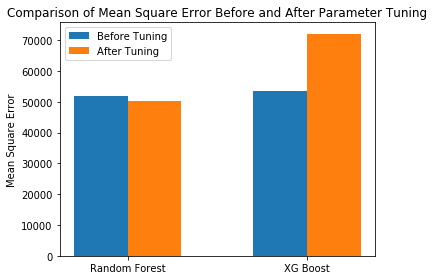

In [332]:
#plotting Mean Square Error showing changes in Mean Square Error before tuning and After tuning

before_tuning  = (ms_random_forest_test , ms_xg_boost_test)
after_tuning = (ms_random_forest_test_after , ms_xg_boost_test_after)

ind = np.arange(len(before_tuning)) 


width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, before_tuning, width,label='Before Tuning')
rects2 = ax.bar(ind + width/2, after_tuning, width,label='After Tuning')


ax.set_ylabel('Mean Square Error')
ax.set_title('Comparison of Mean Square Error Before and After Parameter Tuning')
ax.set_xticks(ind)
ax.set_xticklabels(('Random Forest', 'XG Boost'))
ax.legend()


fig.tight_layout()

plt.show()

# References

1. ProvostFoster, & FawcettTom. (n.d.). Data Science for Business: What you need to know about data mining and data-analytic thinking. Köln: O`Reilly.

2. Grouped bar chart with labels¶. (n.d.). Retrieved from https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

3. Bardak, B. (n.d.). GridSearchCV Regression vs Linear Regression vs Stats.model OLS. Retrieved from https://stats.stackexchange.com/questions/153131/gridsearchcv-regression-vs-linear-regression-vs-stats-model-ols

4. Basic pie chart¶. (n.d.). Retrieved from https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

5. How XGBoost Works. (n.d.). Retrieved from https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html

6. Lab3_solutions1 [.ipynb]. (n.d.). Https://dal.brightspace.com.

7. Lab2 [.ipynb]. (n.d.). Https://dal.brightspace.com.

8. Poddar, H. (2019, March 31). Zomato Bangalore Restaurants. Retrieved from https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants